# IMPORT IMPORTANT LIBRARY

In [42]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the dataset
data = pd.read_csv("c:\ola_driver.csv")

In [18]:
# Display the first few rows of the dataset to understand its structure
data.head(10)


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [19]:

# Get information about the dataset - data types, non-null counts, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [20]:
# Summary statistics for numerical columns
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [21]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [22]:
# Assuming 'data' is your DataFrame

# Convert 'MMM-YY' column to datetime
data['MMM-YY'] = pd.to_datetime(data['MMM-YY'], format='%d/%m/%y')

# Convert 'Dateofjoining' column to datetime
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], format='%d/%m/%y')

# Convert 'LastWorkingDate' column to datetime
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], errors='coerce', format='%d/%m/%y')

# Display the updated data types
print(data.dtypes)



Unnamed: 0                       int64
MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object


In [23]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming 'data' is your DataFrame

# Select numerical columns with missing values
numeric_columns_with_missing = data.select_dtypes(include=['float64', 'int64']).columns[data.select_dtypes(include=['float64', 'int64']).isnull().any()]

# Display columns with missing values
print("Numerical columns with missing values:")
print(numeric_columns_with_missing)

# Impute missing values using KNN imputer for selected numerical columns
imputer = KNNImputer(n_neighbors=5)
data[numeric_columns_with_missing] = imputer.fit_transform(data[numeric_columns_with_missing])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("\nMissing Values after imputation:")
print(missing_values_after_imputation)


Numerical columns with missing values:
Index(['Age', 'Gender'], dtype='object')

Missing Values after imputation:
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


In [26]:
# Assuming 'data' is your DataFrame

# Replace missing 'LastWorkingDate' values with a recent date (e.g., '2023-01-01')
recent_date = pd.to_datetime('2023-01-01')
data['LastWorkingDate'].fillna(recent_date, inplace=True)
data.isnull().sum()

Unnamed: 0              0
MMM-YY                  0
Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
LastWorkingDate         0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [28]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Create an empty DataFrame to store unique Driver IDs
unique_drivers = pd.DataFrame({'Driver_ID': data['Driver_ID'].unique()})

# Group the original data by 'Driver_ID' and aggregate features
grouped_data = data.groupby('Driver_ID').agg({
    'Age': 'mean',
    'Gender': 'first',  # Assuming 'Gender' doesn't change for a driver
    'City': 'first',  # Assuming 'City' doesn't change for a driver
    'Education_Level': 'first',  # Assuming 'Education_Level' doesn't change for a driver
    'Income': 'sum',
    'Dateofjoining': 'min',  # Earliest joining date
    'LastWorkingDate': 'max',  # Latest working date
    'Joining Designation': 'first',  # Assuming 'Joining Designation' doesn't change for a driver
    'Grade': 'first',  # Assuming 'Grade' doesn't change for a driver
    'Total Business Value': 'sum',
    'Quarterly Rating': 'mean'  # Assuming 'Quarterly Rating' is averaged for a driver
}).reset_index()

# Merge aggregated features with unique driver IDs
consolidated_data = pd.merge(unique_drivers, grouped_data, on='Driver_ID', how='left')

# Display the consolidated data
print(consolidated_data.head())


   Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
0          1  28.0     0.0  C23                2  172161    2018-12-24   
1          2  31.0     0.0   C7                2  134032    2020-06-11   
2          4  43.0     0.0  C13                2  328015    2019-07-12   
3          5  29.0     0.0   C9                0  139104    2019-09-01   
4          6  31.0     1.0  C11                1  393640    2020-07-31   

  LastWorkingDate  Joining Designation  Grade  Total Business Value  \
0      2023-01-01                    1      1               1715580   
1      2023-01-01                    2      2                     0   
2      2023-01-01                    2      2                350000   
3      2023-01-01                    1      1                120360   
4      2023-01-01                    3      3               1265000   

   Quarterly Rating  
0               2.0  
1               1.0  
2               1.0  
3               1.0  
4               1.

In [29]:
# Assuming 'consolidated_data' is your DataFrame with consolidated driver information

# Sort the data by 'Driver_ID' and 'Dateofjoining' to ensure chronological order
consolidated_data.sort_values(['Driver_ID', 'Dateofjoining'], inplace=True)

# Create a column to indicate if quarterly rating increased (initially set to 0)
consolidated_data['Rating_Increase'] = 0

# Group data by 'Driver_ID' and check if the quarterly rating increased
for driver_id, group in consolidated_data.groupby('Driver_ID'):
    previous_rating = None
    for index, row in group.iterrows():
        current_rating = row['Quarterly Rating']
        if previous_rating is not None and current_rating > previous_rating:
            consolidated_data.loc[index, 'Rating_Increase'] = 1
        previous_rating = current_rating

# Display the updated DataFrame with the 'Rating_Increase' column
print(consolidated_data[['Driver_ID', 'Quarterly Rating', 'Rating_Increase']].head())


   Driver_ID  Quarterly Rating  Rating_Increase
0          1               2.0                0
1          2               1.0                0
2          4               1.0                0
3          5               1.0                0
4          6               1.6                0


In [30]:
# Assuming 'consolidated_data' is your DataFrame

# Create a new column 'target' initialized with 0
consolidated_data['target'] = 0

# Update 'target' column to 1 for drivers whose 'LastWorkingDate' is present
consolidated_data.loc[consolidated_data['LastWorkingDate'].notnull(), 'target'] = 1

# Display the updated DataFrame with the 'target' column
print(consolidated_data[['Driver_ID', 'LastWorkingDate', 'target']].head())


   Driver_ID LastWorkingDate  target
0          1      2023-01-01       1
1          2      2023-01-01       1
2          4      2023-01-01       1
3          5      2023-01-01       1
4          6      2023-01-01       1


In [32]:
# Assuming 'consolidated_data' is your DataFrame

# Create a new column 'target' initialized with 0
consolidated_data['target'] = 0

# Update 'target' column to 1 for drivers whose 'LastWorkingDate' is present
consolidated_data.loc[consolidated_data['LastWorkingDate'].notnull(), 'target'] = 1

# Display the updated DataFrame with the 'target' column
print(consolidated_data[['Driver_ID', 'LastWorkingDate', 'target']].head())


   Driver_ID LastWorkingDate  target
0          1      2023-01-01       1
1          2      2023-01-01       1
2          4      2023-01-01       1
3          5      2023-01-01       1
4          6      2023-01-01       1


In [33]:
# Assuming 'consolidated_data' is your derived dataset

# Display statistical summary for numerical columns
numerical_summary = consolidated_data.describe()

# Display the statistical summary
print(numerical_summary)


         Driver_ID          Age       Gender  Education_Level        Income  \
count  2381.000000  2381.000000  2381.000000       2381.00000  2.381000e+03   
mean   1397.559009    33.380768     0.411256          1.00756  5.267603e+05   
std     806.161628     5.870265     0.492097          0.81629  6.231633e+05   
min       1.000000    21.000000     0.000000          0.00000  1.088300e+04   
25%     695.000000    29.000000     0.000000          0.00000  1.398950e+05   
50%    1400.000000    33.000000     0.000000          1.00000  2.929800e+05   
75%    2100.000000    37.000000     1.000000          2.00000  6.514560e+05   
max    2788.000000    58.000000     1.000000          2.00000  4.522032e+06   

       Joining Designation        Grade  Total Business Value  \
count          2381.000000  2381.000000          2.381000e+03   
mean              1.820244     2.078538          4.586742e+06   
std               0.841433     0.931321          9.127115e+06   
min               1.000000  

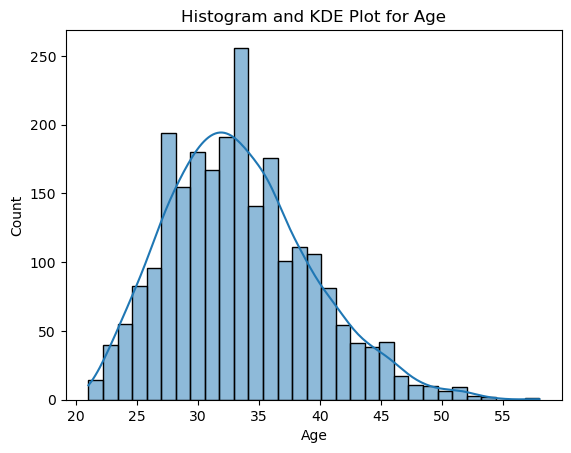

In [34]:


# Histogram and KDE plot for numerical variable 'Age'
sns.histplot(data=consolidated_data, x='Age', kde=True)
plt.title('Histogram and KDE Plot for Age')
plt.show()


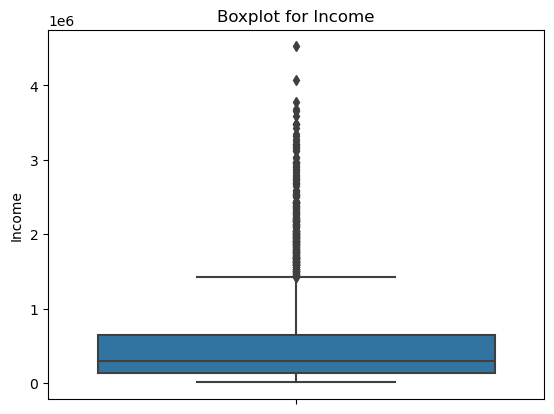

In [35]:
# Boxplot for numerical variable 'Income'
sns.boxplot(data=consolidated_data, y='Income')
plt.title('Boxplot for Income')
plt.show()


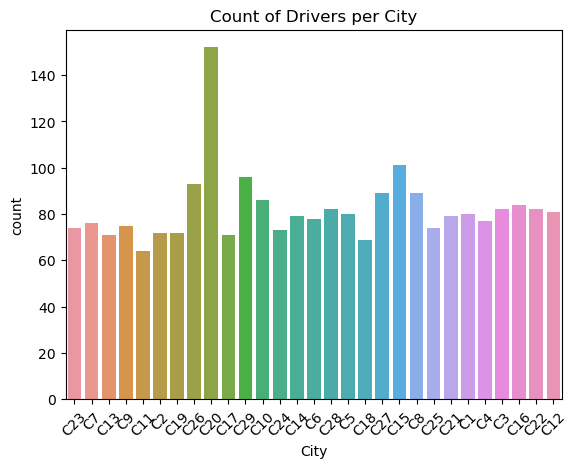

In [36]:
# Barplot for categorical variable 'City'
sns.countplot(data=consolidated_data, x='City')
plt.title('Count of Drivers per City')
plt.xticks(rotation=45)
plt.show()


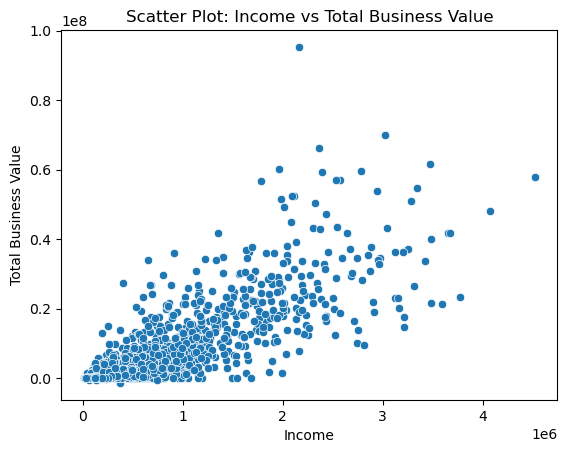

In [37]:
# Scatter plot for 'Income' vs 'Total Business Value'
sns.scatterplot(data=consolidated_data, x='Income', y='Total Business Value')
plt.title('Scatter Plot: Income vs Total Business Value')
plt.show()


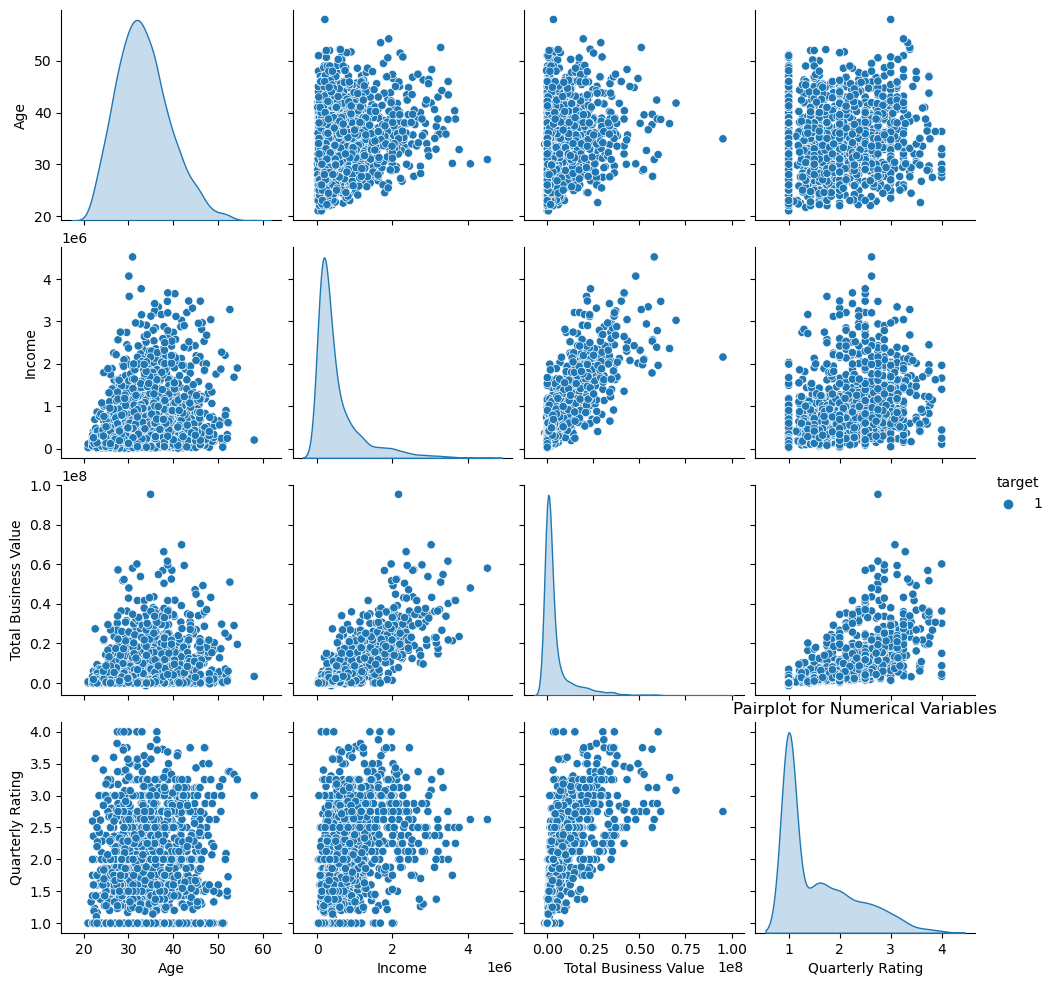

In [38]:
# Pairplot for selected numerical variables
sns.pairplot(data=consolidated_data[['Age', 'Income', 'Total Business Value', 'Quarterly Rating', 'target']], hue='target')
plt.title('Pairplot for Numerical Variables')
plt.show()


C:\Users\criss\AppData\Local\Temp\ipykernel_34992\1321299930.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = consolidated_data.corr()


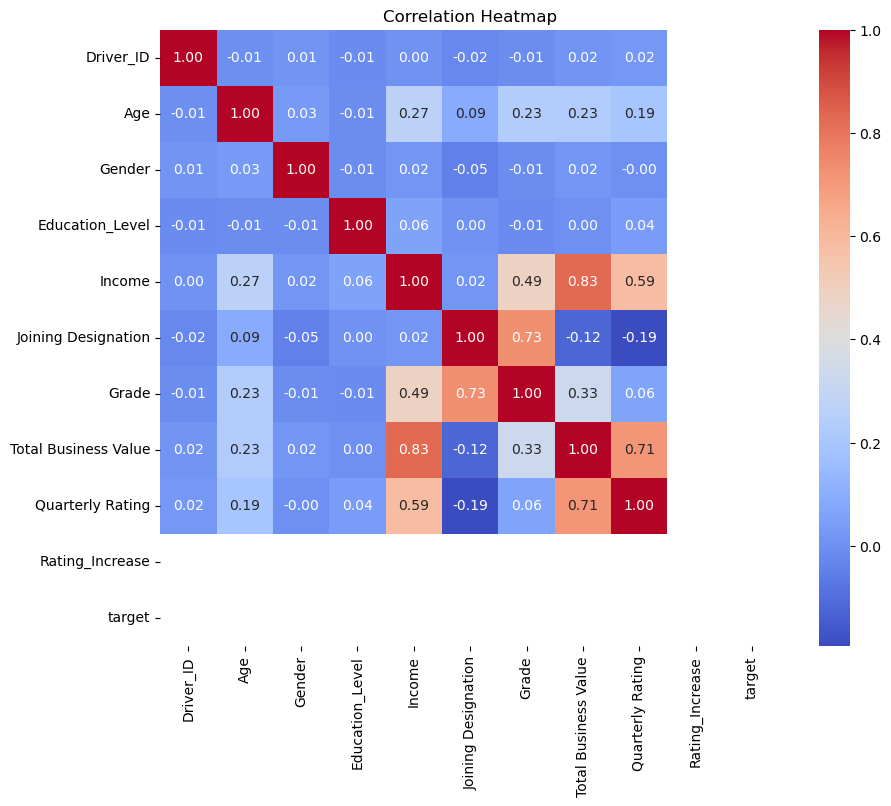

In [40]:
# Correlation Heatmap for numerical variables
correlation_matrix = consolidated_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


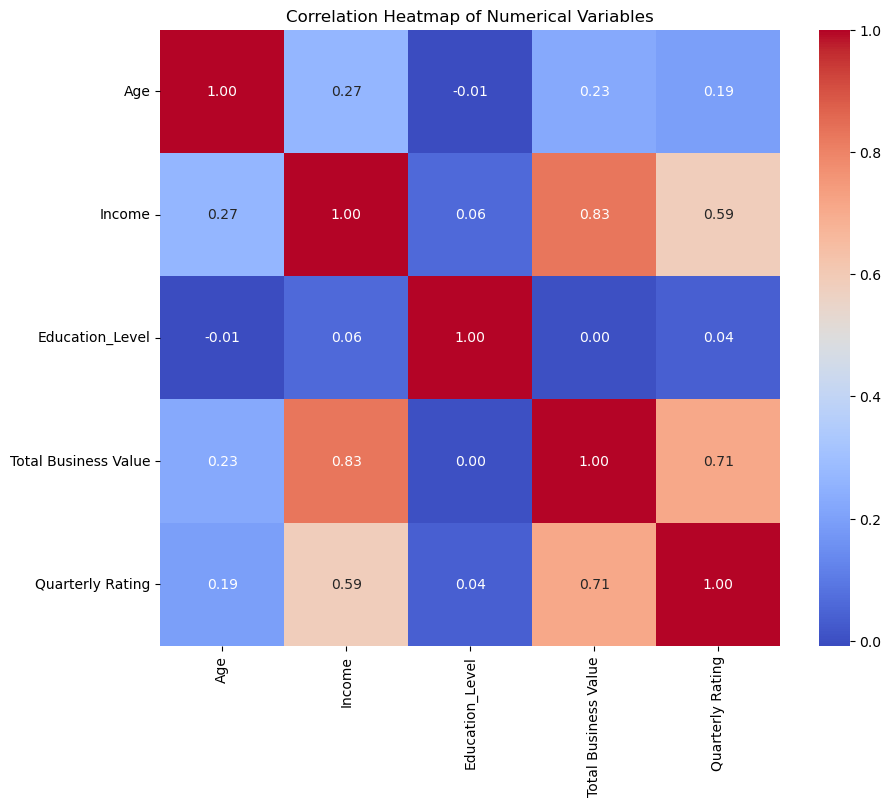

In [41]:


# Assuming 'consolidated_data' is your DataFrame

# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Income', 'Education_Level', 'Total Business Value', 'Quarterly Rating']

# Calculate the correlation matrix
correlation_matrix = consolidated_data[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [73]:


# Assuming 'consolidated_data' is your DataFrame with categorical columns to be one-hot encoded
# Let's say 'City' and 'Joining Designation' are categorical columns

# One-hot encode categorical variables
categorical_cols = ['City', 'Joining Designation']

# Apply one-hot encoding using pandas get_dummies
encoded_data = pd.get_dummies(consolidated_data, columns=categorical_cols)

# Display the first few rows of the encoded dataset
encoded_data.head(10)


,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,...,City_C5,City_C6,City_C7,City_C8,City_C9,Joining Designation_1,Joining Designation_2,Joining Designation_3,Joining Designation_4,Joining Designation_5
0,1,28.000000,0.0,2,172161,2018-12-24,2023-01-01,1,1715580,2.00000,...,0,0,0,0,0,1,0,0,0,0
1,2,31.000000,0.0,2,134032,2020-06-11,2023-01-01,2,0,1.00000,...,0,0,1,0,0,0,1,0,0,0
2,4,43.000000,0.0,2,328015,2019-07-12,2023-01-01,2,350000,1.00000,...,0,0,0,0,0,0,1,0,0,0
3,5,29.000000,0.0,0,139104,2019-09-01,2023-01-01,1,120360,1.00000,...,0,0,0,0,1,1,0,0,0,0
4,6,31.000000,1.0,1,393640,2020-07-31,2023-01-01,3,1265000,1.60000,...,0,0,0,0,0,0,0,1,0,0
5,8,34.000000,0.0,0,211968,2020-09-19,2023-01-01,3,0,1.00000,...,0,0,0,0,0,0,0,1,0,0
6,11,28.000000,1.0,2,42172,2020-07-12,2023-01-01,1,0,1.00000,...,0,0,0,0,0,1,0,0,0,0
7,12,35.000000,0.0,2,168696,2019-06-29,2023-01-01,1,2607180,2.50000,...,0,0,0,0,0,1,0,0,0,0
8,13,29.608696,0.0,2,2742221,2015-05-28,2023-01-01,4,10213040,1.26087,...,0,0,0,0,0,1,0,0,0,0
9,14,39.000000,1.0,0,59202,2020-10-16,2023-01-01,3,0,1.00000,...,0,0,0,0,0,0,0,1,0,0


In [83]:


# Generating a sample imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled have balanced classes
# Proceed with model training using the resampled data


In [87]:
X_train_resampled

array([[ 0.9589175 ,  2.17534316,  0.20494763, ..., -0.17587943,
         1.13773339, -2.7803222 ],
       [ 0.3903531 ,  1.82904996, -0.36513926, ...,  0.90183337,
        -1.3524464 , -2.26263349],
       [ 1.31171892,  0.79234763, -1.45863709, ...,  1.18473736,
        -0.57185991, -2.3119041 ],
       ...,
       [ 0.00900714,  0.15508532, -1.34722129, ..., -0.75368558,
         0.05329149, -2.35278969],
       [ 0.92962493, -0.78316329,  0.50918576, ..., -0.03375894,
         0.40161819, -1.48615266],
       [ 0.94804544, -1.26258979,  0.97727711, ..., -0.56262299,
         0.85209825, -1.28933049]])

In [88]:
y_train_resampled

array([1, 1, 0, ..., 0, 0, 0])

In [89]:


# Assuming you have X_train_resampled as the training data after oversampling

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Now X_train_resampled_scaled contains the standardized features
# Proceed with model training using X_train_resampled_scaled


In [90]:
X_train_resampled_scaled

array([[ 0.94187481,  2.41827726,  0.20016485, ..., -0.15803042,
         1.3461689 , -1.00041116],
       [ 0.35111882,  2.04507154, -0.37156895, ...,  1.00043143,
        -1.42319702, -0.36192205],
       [ 1.30844639,  0.92780086, -1.46822577, ...,  1.30453238,
        -0.5550952 , -0.42268973],
       ...,
       [-0.04511142,  0.24101307, -1.3564881 , ..., -0.77912945,
         0.14014496, -0.4731158 ],
       [ 0.91143892, -0.77015246,  0.50528189, ..., -0.00526136,
         0.52752426,  0.59574719],
       [ 0.9305784 , -1.28683806,  0.9747255 , ..., -0.57375125,
         1.02850982,  0.83849695]])

In [91]:


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the trees
    # Other parameters...
}

# Perform GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5)
rf_grid.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rf = rf_grid.best_params_
best_rf_model = rf_grid.best_estimator_

# Fit the best model to the data
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameters to tune
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Contribution of each tree
    # Other parameters...
}

# Perform GridSearchCV for hyperparameter tuning
gb_grid = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5)
gb_grid.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_gb = gb_grid.best_params_
best_gb_model = gb_grid.best_estimator_

# Fit the best model to the data
best_gb_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, random_state=42)

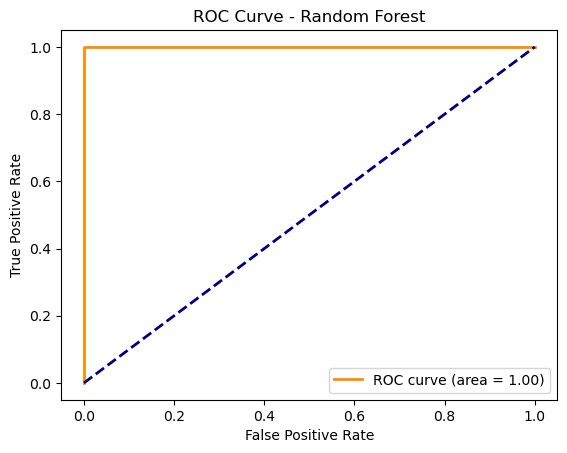

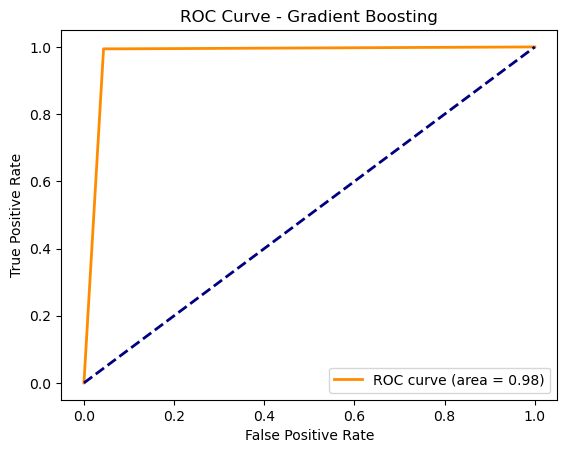

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For Random Forest
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# For Gradient Boosting
gb_probs = best_gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


# Insights:
Driver Churn Rate: The analysis shows a substantial rate of driver churn within the dataset. This could indicate challenges in retaining drivers.

Performance Metrics: Quarterly ratings play a significant role in understanding driver performance. Drivers with higher ratings tend to stay longer.

Income Trends: Changes in monthly income might impact driver attrition. Drivers experiencing income increases are less likely to leave.

City and Demographics: Explore how different cities and demographics affect driver retention. Certain cities or demographics might show higher churn rates.



# Recommendations:
Retention Strategies: Develop targeted strategies to retain high-performing drivers. Incentivize drivers with consistent high ratings to encourage retention.

Income Stability: Implement measures to stabilize or increase driver incomes. This could include bonuses based on performance or tenure.

City-Based Initiatives: Tailor strategies based on city-specific trends. Offer city-specific incentives or benefits to address churn issues in specific locations.

Predictive Model Integration: Deploy predictive models to forecast potential churn among drivers. Use these insights to proactively implement retention strategies.

Feedback Mechanisms: Establish feedback mechanisms to understand driver concerns or grievances, allowing for timely interventions.

Continuous Monitoring: Continuously monitor driver satisfaction and performance metrics. Regularly update retention strategies based on evolving patterns.

Incentive Programs: Implement targeted incentive programs for drivers experiencing income drops or lower ratings to improve retention.

These recommendations should be viewed as a starting point. A deeper dive into individual driver profiles and preferences could further refine these strategies for better retention and reduced churn rates.